## Pgmpy

In [1]:
import random
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
import networkx as nx
import pylab as plt

In [2]:
random.seed(42)

### Reading all the data to see the column headers

In [3]:
data = pd.read_csv("../data/modelling datasets/transfers_final.csv")
data.head()

,Unnamed: 0,ID,arrival_league,year,origin_league,grouping_position,arrival_club_tier,origin_club_tier,age_grouping_1,age_grouping_2,transfer_price_group1,transfer_price_group2,potential_fifa,overall_fifa,new_height,appearances,goals,N
0,0,1913,Premier League,Before2016,Ligue 1,D,Tier_2,Tier_1,U25,Under30,10Mto5M,20Mto5M,85above,75to84,6to6.5,150to300,below20,EU
1,14,1559,1 Bundesliga,Before2016,Ligue 1,M,Tier_1,Tier_1,U30,Under30,10Mto5M,20Mto5M,75to84,75to84,5.5to6,150to300,20to50,AF
2,22,1923,Serie A,Before2016,Serie A,F,Tier_2,Tier_3,U21,Under23,10Mto5M,20Mto5M,75to84,65to74,6to6.5,50to150,below20,AF
3,23,1924,Serie A,Before2016,Serie A,F,Tier_2,Tier_1,U25,Under23,10Mto5M,20Mto5M,75to84,65to74,6to6.5,50to150,below20,AF
4,28,1532,Serie A,Before2016,Serie A,M,Tier_2,Tier_2,U21,Under23,10Mto5M,20Mto5M,75to84,65to74,6to6.5,50to150,below20,AF


In [4]:
data.describe(include='all').loc['unique']

Unnamed: 0               NaN
ID                       NaN
arrival_league             6
year                       2
origin_league              6
grouping_position          4
arrival_club_tier          4
origin_club_tier           4
age_grouping_1             4
age_grouping_2             3
transfer_price_group1      4
transfer_price_group2      3
potential_fifa             4
overall_fifa               4
new_height                 4
appearances                4
goals                      4
N                          6
Name: unique, dtype: object

In [5]:
data.describe(include='all')

,Unnamed: 0,ID,arrival_league,year,origin_league,grouping_position,arrival_club_tier,origin_club_tier,age_grouping_1,age_grouping_2,transfer_price_group1,transfer_price_group2,potential_fifa,overall_fifa,new_height,appearances,goals,N
count,1913.000000,1913.000000,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913
unique,NaN,NaN,6,2,6,4,4,4,4,3,4,3,4,4,4,4,4,6
top,NaN,NaN,Premier League,After2016,Other,F,Tier_1,Tier_1,U25,Under30,10Mto5M,20Mto5M,75to84,65to74,6to6.5,50to150,below20,EU
freq,NaN,NaN,647,981,566,805,1228,775,871,1006,964,1572,1466,1077,1250,924,907,1267
mean,2935.660220,967.880293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1879.433961,561.899568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1253.000000,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2640.000000,963.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4599.000000,1456.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Renaming all the columns to match the nodes of the DAG

In [6]:
data.rename(columns={"arrival_league": "AL", "year": "Y", "origin_league": "OL", "grouping_position": "P", 
                     "arrival_club_tier": "AC", "origin_club_tier": "OC", "age_grouping_2": "A", 
                     "transfer_price_group2": "T", "potential_fifa": "Pot", "overall_fifa": "Ovr", 
                     "new_height": "H", "appearances": "App"}, inplace=True)
data = data[["A", "N", "Y", "P", "Pot", "Ovr", "App", "AL", "AC", "OL", "OC", "T"]]
data.head()

,A,N,Y,P,Pot,Ovr,App,AL,AC,OL,OC,T
0,Under30,EU,Before2016,D,85above,75to84,150to300,Premier League,Tier_2,Ligue 1,Tier_1,20Mto5M
1,Under30,AF,Before2016,M,75to84,75to84,150to300,1 Bundesliga,Tier_1,Ligue 1,Tier_1,20Mto5M
2,Under23,AF,Before2016,F,75to84,65to74,50to150,Serie A,Tier_2,Serie A,Tier_3,20Mto5M
3,Under23,AF,Before2016,F,75to84,65to74,50to150,Serie A,Tier_2,Serie A,Tier_1,20Mto5M
4,Under23,AF,Before2016,M,75to84,65to74,50to150,Serie A,Tier_2,Serie A,Tier_2,20Mto5M


### Using the functions in the PGMPY library to replicate the DAG from bnlearn

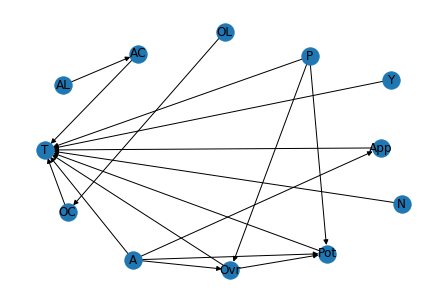

In [7]:
bn_model = BayesianModel([('OL', 'OC'), ('AL', 'AC'), ('Ovr', 'Pot'), ('A', 'App'), ('OC', 'T'), 
                          ('AC', 'T'), ('N', 'T'), ('Y', 'T'), ('Ovr', 'T'), ('Pot', 'T'), 
                          ('P', 'Ovr'), ('P', 'Pot'), ('A', 'T'), ('A', 'Ovr'), ('A', 'Pot'),
                          ('App', 'T'), ('P', 'T')])
nx.draw(bn_model, with_labels=True)
plt.show()

### Fitting the DAG with the data using a Bayesian Estimator

In [8]:
bn_model.fit(data, estimator=BayesianEstimator, prior_type="BDeu", equivalent_sample_size=10) # default equivalent_sample_size=5

### The next step is to extract all the CPTs that the model fitting built, in order to transfer them to Pyro

In [10]:
# Demo of how to extract CPD
a = bn_model.get_cpds(node="Ovr")

In [11]:
a.state_names

{'Ovr': ['65to74', '75to84', '85above', 'below65'],
 'A': ['Above30', 'Under23', 'Under30'],
 'P': ['D', 'F', 'GK', 'M']}

In [12]:
a.get_evidence()

['P', 'A']

In [13]:
a.variables

['Ovr', 'A', 'P']

In [14]:
a.values.T

array([[[0.29615385, 0.48076923, 0.20384615, 0.01923077],
        [0.66518808, 0.14992903, 0.00088715, 0.18399574],
        [0.48020322, 0.48861247, 0.01769446, 0.01348984]],

       [[0.48076923, 0.38846154, 0.11153846, 0.01923077],
        [0.74954935, 0.1546868 , 0.00326724, 0.09249662],
        [0.43625537, 0.49951191, 0.05671613, 0.0075166 ]],

       [[0.52966102, 0.32627119, 0.12288136, 0.02118644],
        [0.71638655, 0.16176471, 0.0105042 , 0.11134454],
        [0.44090909, 0.50636364, 0.04818182, 0.00454545]],

       [[0.02659574, 0.66489362, 0.28191489, 0.02659574],
        [0.68529019, 0.20096731, 0.00083389, 0.11290861],
        [0.42233687, 0.53945901, 0.03416062, 0.0040435 ]]])

## Pyro

In [15]:
from statistics import mean
import torch
import numpy as np
import pyro
import pyro.distributions as dist
from pyro.infer import Importance, EmpiricalMarginal
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

pyro.set_rng_seed(101)

### Defining the labels with the categories of all the variables

In [16]:
# labels
N_label = bn_model.get_cpds(node="N").state_names["N"]
print(N_label)
P_label = bn_model.get_cpds(node="P").state_names["P"]
print(P_label)
Age_label = bn_model.get_cpds(node="A").state_names["A"]
print(Age_label)
OC_label = bn_model.get_cpds(node="OC").state_names["OC"]
print(OC_label)
OL_label = bn_model.get_cpds(node="OL").state_names["OL"]
print(OL_label)
AC_label = bn_model.get_cpds(node="AC").state_names["AC"]
print(AC_label)
AL_label = bn_model.get_cpds(node="AL").state_names["AL"]
print(AL_label)
Ovr_label = bn_model.get_cpds(node="Ovr").state_names["Ovr"]
print(Ovr_label)
Pot_label = bn_model.get_cpds(node="Pot").state_names["Pot"]
print(Pot_label)
Y_label = bn_model.get_cpds(node="Y").state_names["Y"]
print(Y_label)
TP_label = bn_model.get_cpds(node="T").state_names["T"]
print(TP_label)

['AF', 'AS', 'EU', 'N_A', 'OC', 'SA']
['D', 'F', 'GK', 'M']
['Above30', 'Under23', 'Under30']
['Tier_1', 'Tier_2', 'Tier_3', 'Tier_4']
['1 Bundesliga', 'Ligue 1', 'Other', 'Premier League', 'Primera Division', 'Serie A']
['Tier_1', 'Tier_2', 'Tier_3', 'Tier_4']
['1 Bundesliga', 'Ligue 1', 'Other', 'Premier League', 'Primera Division', 'Serie A']
['65to74', '75to84', '85above', 'below65']
['65to74', '75to84', '85above', 'below65']
['After2016', 'Before2016']
['20Mto5M', '60Mto20M', 'Above60M']


### Transferring the CPTs learnt by fitting the model using pgmpy to pyro for modeliing

In [17]:
Age_probs = torch.tensor(bn_model.get_cpds(node="A").values.T)
Position_probs = torch.tensor(bn_model.get_cpds(node="P").values.T)
Nationality_probs = torch.tensor(bn_model.get_cpds(node="N").values.T)
year_probs = torch.tensor(bn_model.get_cpds(node="Y").values.T)
arrival_league_probs = torch.tensor(bn_model.get_cpds(node="AL").values.T)
origin_league_probs = torch.tensor(bn_model.get_cpds(node="OL").values.T)
arrival_club_probs = torch.tensor(bn_model.get_cpds(node="AC").values.T)
origin_club_probs = torch.tensor(bn_model.get_cpds(node="OC").values.T)
overall_probs = torch.tensor(bn_model.get_cpds(node="Ovr").values.T)
potential_probs = torch.tensor(bn_model.get_cpds(node="Pot").values.T)
app_probs = torch.tensor(bn_model.get_cpds(node="App").values.T)
transfer_price_probs = torch.tensor(bn_model.get_cpds(node="T").values.T)

### Defining the pyro model that will be the base of all the experiments/interventions

In [18]:
def pyro_model():
    
    Age = pyro.sample("A", dist.Categorical(probs=Age_probs)) 
    Position = pyro.sample("P", dist.Categorical(probs=Position_probs)) 
    Nationality = pyro.sample("N", dist.Categorical(probs=Nationality_probs)) 
    Year = pyro.sample("Y", dist.Categorical(probs=year_probs)) 
    Arrival_league = pyro.sample("AL", dist.Categorical(probs=arrival_league_probs))
    Origin_league = pyro.sample('OL', dist.Categorical(probs=origin_league_probs))
    Arrival_club = pyro.sample('AC', dist.Categorical(probs=arrival_club_probs[Arrival_league]))
    Origin_club = pyro.sample('OC', dist.Categorical(probs=origin_club_probs[Origin_league]))
    Overall = pyro.sample('Ovr', dist.Categorical(probs=overall_probs[Position][Age]))
    Potential = pyro.sample('Pot',dist.Categorical(probs=potential_probs[Position][Overall][Age]))
    Appearances = pyro.sample('App',dist.Categorical(probs=app_probs[Age]))                            

    transfer_price = pyro.sample('TP', dist.Categorical(probs=transfer_price_probs[Year][Potential][Position][Overall][Origin_club][Nationality][Appearances][Arrival_club][Age]))
                            
    return{'A': Age,'P': Position,'N': Nationality,'Y': Year,'AL': Arrival_league,'OL':Origin_league,'AC':Arrival_club,'OC':Origin_club,'Ovr':Overall,'Pot':Potential, 'App':Appearances, 'TP':transfer_price} 

print(pyro_model())

{'A': tensor(2), 'P': tensor(3), 'N': tensor(2), 'Y': tensor(0), 'AL': tensor(3), 'OL': tensor(4), 'AC': tensor(1), 'OC': tensor(0), 'Ovr': tensor(1), 'Pot': tensor(2), 'App': tensor(0), 'TP': tensor(0)}


### Defining an Importance sampling function that uses Importance Sampling to calculate the posterior, generates a list of samples using the Empirical Marginal algorithm and outputs a Histogram plot of the required variable

In [39]:
def importance_sampling(model, title, xlabel, ylabel, marginal_on="TP", label=TP_label):
    posterior = pyro.infer.Importance(model, num_samples=5000).run()
    marginal = EmpiricalMarginal(posterior, marginal_on)
    samples = [marginal().item() for _ in range(5000)]
    unique, counts = np.unique(samples, return_counts=True)

    plt.bar(unique, counts, align='center', alpha=0.5)
    plt.xticks(unique, label)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    for i in range(len(label)):
        plt.text(i, counts[i]+10, str(counts[i]))
    plt.title(title)

### Experiment 1: Intervention on Nationality = SA and Position = F

The first experiment is to intervene on all South American Forward players. The intuition is that they tend to have a higher transfer fee when we talk about Forward players. We want to see if our model can validate this intuition

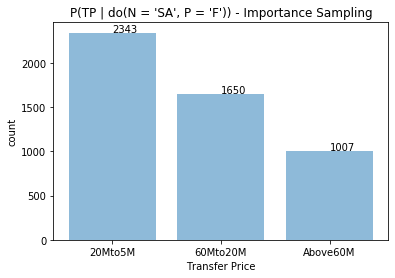

In [21]:
# Intervening on south american fowards

do_on_SA_F = pyro.do(pyro_model, data={'N': torch.tensor(5), 'P': torch.tensor(1)})

importance_sampling(model=do_on_SA_F, title="P(TP | do(N = 'SA', P = 'F')) - Importance Sampling",
                    xlabel='Transfer Price', ylabel='count', marginal_on='TP')

### Experiment 2: Intervention on ArrivalLeague = Premier League and OriginLeague = Premier League

The second experiment is to intervene on Origin and Arrival Leagues to be Premier League. The intuition here is that all intra-league transfers in the Premier League extract a higher avgerage transfer fee. 

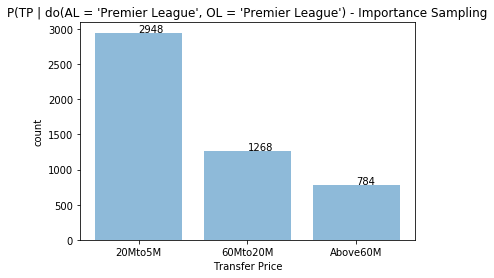

In [22]:
# transfer between english teams

do_on_PremierL = pyro.do(pyro_model, data={'AL': torch.tensor(3), 'OL': torch.tensor(3)})

importance_sampling(model=do_on_PremierL, 
                    title="P(TP | do(AL = 'Premier League', OL = 'Premier League') - Importance Sampling",
                    xlabel='Transfer Price', ylabel='count', marginal_on='TP')

### Experiment 3: Intervention on ArrivalClub = Tier1 and OriginClub = Tier1

The third experiment is to intervene on Arrival and Origin clubs being Tier1. The intuition here is that transfers between Tier1 clubs extract a higher average Transfer fee

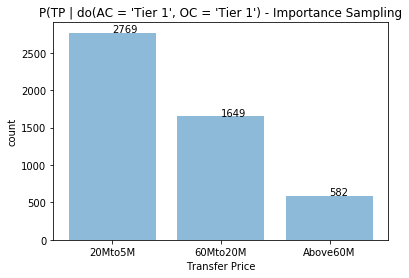

In [23]:
# intervening on transfers betwen tier 1 clubs

do_on_Tier1 = pyro.do(pyro_model, data={'AC': torch.tensor(0), 'OC': torch.tensor(0)})

importance_sampling(model=do_on_Tier1, 
                    title="P(TP | do(AC = 'Tier 1', OC = 'Tier 1') - Importance Sampling",
                    xlabel='Transfer Price', ylabel='count', marginal_on='TP')

### Experiment 4: Intervention on Age = Under23 and Potential = 85above

The fourth experiment explores the intervention where Age is under 23 years old and player potential rating for the year of transfer is 85 and above. The intuition here is that a young player with a very high potential rating should extract a higher average transfer fee

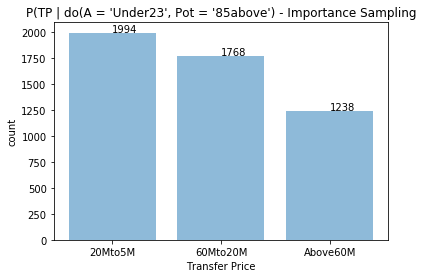

In [24]:
# intervening on young and high potenital stars to test intution about our transfer strategy

do_on_young_stars = pyro.do(pyro_model, data={'A': torch.tensor(1), 'Pot': torch.tensor(2)})

importance_sampling(model=do_on_young_stars, 
                    title="P(TP | do(A = 'Under23', Pot = '85above') - Importance Sampling",
                    xlabel='Transfer Price', ylabel='count', marginal_on='TP')

### Experiment 5: Intervening on Year = before 2016 and then on Y = after 2016

This experiment is something that we want our model to capture. As mentioned earlier, the said inflation in player transfer fee for high potential players, according to our beliefs was the year 2016. So we do a before and after intervention to see if our model captures this change

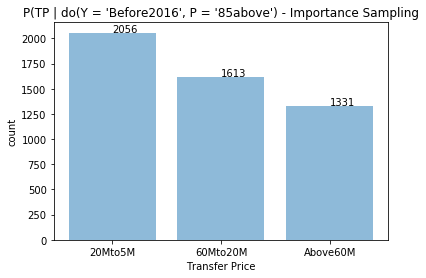

In [25]:
# intevrening on year to see inflated probabilities for price brackets
# intervening on players for transfers before 2016

do_before2016 = pyro.do(pyro_model, data={'Y': torch.tensor(1)})
do_before2016_conditioned_model = pyro.condition(do_before2016, data={'Pot':torch.tensor(2)})

importance_sampling(model=do_before2016_conditioned_model, 
                    title="P(TP | do(Y = 'Before2016', P = '85above') - Importance Sampling",
                    xlabel='Transfer Price', ylabel='count', marginal_on='TP')

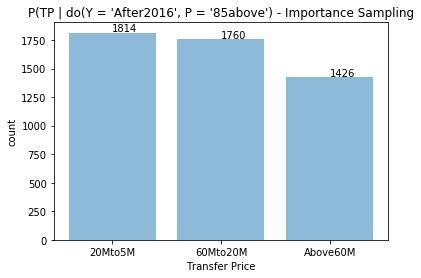

In [26]:
# intervening on players for transfers after 2016

do_after2016 = pyro.do(pyro_model, data={'Y': torch.tensor(0)})
do_after2016_conditioned_model = pyro.condition(do_after2016, data={'Pot':torch.tensor(2)})

importance_sampling(model=do_after2016_conditioned_model, 
                    title="P(TP | do(Y = 'After2016', P = '85above') - Importance Sampling",
                    xlabel='Transfer Price', ylabel='count', marginal_on='TP')

## Finding the Causal Effect of all variables on Transfer Price above 20M  

In [27]:
def causal_effect(model1, model2, marginal_on, marginal_val, n_samples=5000):
    posterior1 = pyro.infer.Importance(model1, num_samples=n_samples).run()
    marginal1 = EmpiricalMarginal(posterior1, marginal_on)
    samples1 = [marginal1().item() for _ in range(n_samples)]
    unique1, counts1 = np.unique(samples1, return_counts=True)
    
    posterior2 = pyro.infer.Importance(model2, num_samples=n_samples).run()
    marginal2 = EmpiricalMarginal(posterior2, marginal_on)
    samples2 = [marginal2().item() for _ in range(n_samples)]
    unique2, counts2 = np.unique(samples2, return_counts=True)

    return counts1[marginal_val] / n_samples  - counts2[marginal_val] / n_samples

In [28]:
# Causal effect of year on Transfer price above 60M
do_before2016 = pyro.do(pyro_model, data={'Y': torch.tensor(1)})
do_after2016 = pyro.do(pyro_model, data={'Y': torch.tensor(0)})

#P(TP > Above60M | do(Y = After2016) - P(TP > Above60M | do(Y = Before2016))
causal_effect(model1=do_before2016, model2=do_after2016, marginal_on='TP', marginal_val=2)

-0.00739999999999999

In [29]:
# Causal effect of age on Transfer price above 60M
# Age_Label = ['Above30', 'Under23', 'Under30']
do_above30 = pyro.do(pyro_model, data={'A': torch.tensor(0)})
do_under30 = pyro.do(pyro_model, data={'A': torch.tensor(2)})

#P(TP > Above60M | do(A = Above30) - P(TP > Above60M | do(A = Under30))
causal_effect(model1=do_above30, model2=do_under30, marginal_on='TP', marginal_val=2)

0.15059999999999998

In [30]:
# Causal effect of Potential Rating on Transfer price betweein 20-60M
# Potential_Label = ['65to74', '75to84', '85above', 'below65']
do_above85_pot = pyro.do(pyro_model, data={'Pot': torch.tensor(2)})
do_below65_pot = pyro.do(pyro_model, data={'Pot': torch.tensor(0)})

#P(TP > Above60M | do(A = Above30) - P(TP > Above60M | do(A = Under30))
causal_effect(model1=do_above85_pot, model2=do_below65_pot, marginal_on='TP', marginal_val=1)

0.042200000000000015

In [31]:
# Causal effect of Overall Rating on Transfer price above 60M
# Potential_Label = ['65to74', '75to84', '85above', 'below65']
do_above85_ovr = pyro.do(pyro_model, data={'Ovr': torch.tensor(2)})
do_below65_ovr = pyro.do(pyro_model, data={'Ovr': torch.tensor(3)})

#P(TP > Above60M | do(A = Above30) - P(TP > Above60M | do(A = Under30))
causal_effect(model1=do_above85_ovr, model2=do_below65_ovr, marginal_on='TP', marginal_val=1)

0.03199999999999997

In [32]:
# Causal effect of Arrival Club on Transfer price above between 20 - 60M
#AC['Tier_1', 'Tier_2', 'Tier_3', 'Tier_4']
do_tier1 = pyro.do(pyro_model, data={'AC': torch.tensor(0)})
do_tier3 = pyro.do(pyro_model, data={'AC': torch.tensor(2)})

#P(TP > Above60M | do(A = Above30) - P(TP > Above60M | do(A = Under30))
causal_effect(model1=do_tier1, model2=do_tier3, marginal_on='TP', marginal_val=1)

-0.016600000000000004

In [33]:
# Causal effect of Origin Club on Transfer price between 20 - 60M
#OC['Tier_1', 'Tier_2', 'Tier_3', 'Tier_4']
oc_do_tier1 = pyro.do(pyro_model, data={'OC': torch.tensor(0)})
oc_do_tier3 = pyro.do(pyro_model, data={'OC': torch.tensor(2)})

#P(TP > Above60M | do(A = Above30) - P(TP > Above60M | do(A = Under30))
causal_effect(model1=oc_do_tier1, model2=oc_do_tier3, marginal_on='TP', marginal_val=1)

0.05140000000000003

In [34]:
# Counterfactual query on Potential changing from 'below65' to '85above'

conditioned_model_for_cf = pyro.condition(pyro_model, data={'Pot':torch.tensor(3)})

cf_posterior = Importance(conditioned_model_for_cf, num_samples=1000).run()
marginal_cf = EmpiricalMarginal(cf_posterior, "TP")
samples_cf = [marginal_cf().item() for _ in range(1000)]
unique_cf, counts_cf = np.unique(samples_cf, return_counts=True)



tp_samples = []

for _ in range(1000):
    trace_handler_1000 = pyro.poutine.trace(conditioned_model_for_cf)

    trace = trace_handler_1000.get_trace()
    N = trace.nodes["N"]['value']
    A = trace.nodes["A"]['value']
    P = trace.nodes["P"]['value']
    Y = trace.nodes["Y"]['value']
    Ovr = trace.nodes["Ovr"]['value']
    AC = trace.nodes["AC"]['value']
    OC = trace.nodes["OC"]['value']
    AL = trace.nodes["AL"]['value']
    OL = trace.nodes["OL"]['value']
    App = trace.nodes["App"]['value']
    
    intervention_model_q1_1000 = pyro.do(pyro_model, data={'Pot': torch.tensor(2)})
    
    counterfact_model_q1_1000 = pyro.condition(intervention_model_q1_1000, data={'N': N, 'A':A, 'P': P, 
                                                                            "Y": Y, "Ovr": Ovr, "AC": AC, 
                                                                            "OC": OC, "AL": AL, "OL": OL, 
                                                                            "App": App})
    
    tp_samples.append(counterfact_model_q1_1000()['TP'])
    
unique_tp, counts_tp = np.unique(tp_samples, return_counts=True)

In [35]:
# P (Y = 60Mto20M | Pot = below65) = 
(counts_cf[1]) / 1000

0.301

In [36]:
# P (Y = 60Mto20M | do(Pot = above85)) = 
(counts_tp[1]) / 1000

0.338

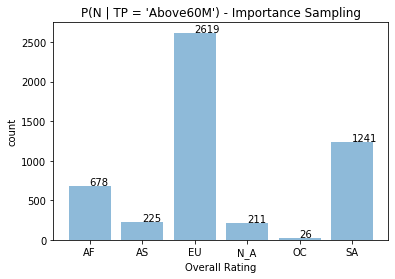

In [46]:
# Query: Are teams paying for 'X' nationality because they think they are great or are they actually better? 
# Compare them to performance conditional on being Nationality={SA, EU, AF, AS}

# Nationality_Label = ['AF', 'AS', 'EU', 'N_A', 'OC', 'SA']
# TP_Label = ['20Mto5M', '60Mto20M', 'Above60M']

cond_on_N = pyro.condition(pyro_model, data={'TP': torch.tensor(2)})

importance_sampling(model=cond_on_N, title="P(N | TP = 'Above60M') - Importance Sampling",
                    xlabel='Overall Rating', ylabel='count', marginal_on='N', label=N_label)

In [47]:
# We determine X = EU

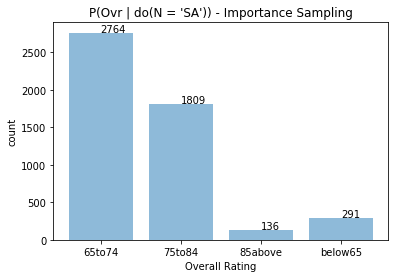

In [48]:
cond_on_SA = pyro.condition(pyro_model, data={'N': torch.tensor(5)})

importance_sampling(model=cond_on_SA, title="P(Ovr | N = 'SA') - Importance Sampling",
                    xlabel='Overall Rating', ylabel='count', marginal_on='Ovr', label=Ovr_label)

In [54]:
(136)/5000 # good players in SA

0.0272

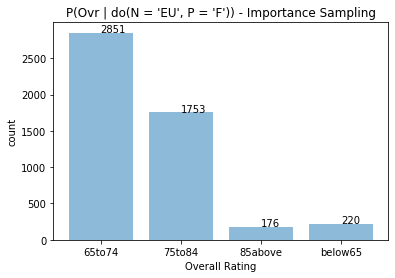

In [40]:
cond_on_EU = pyro.condition(pyro_model, data={'N': torch.tensor(2)})

importance_sampling(model=cond_on_EU, title="P(Ovr | N = 'EU') - Importance Sampling",
                    xlabel='Overall Rating', ylabel='count', marginal_on='Ovr', label=Ovr_label)

In [55]:
(176)/5000 # good players in EU

0.0352

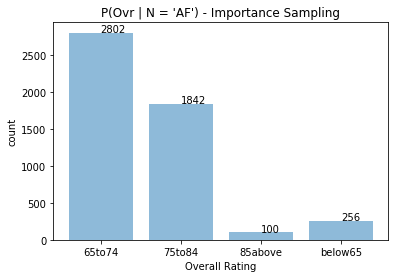

In [57]:
cond_on_AF = pyro.condition(pyro_model, data={'N': torch.tensor(0)})

importance_sampling(model=cond_on_AF, title="P(Ovr | N = 'AF') - Importance Sampling",
                    xlabel='Overall Rating', ylabel='count', marginal_on='Ovr', label=Ovr_label)

In [60]:
(100)/5000 # good players in AF

0.02

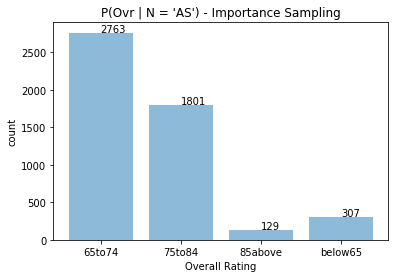

In [58]:
cond_on_AS = pyro.condition(pyro_model, data={'N': torch.tensor(1)})

importance_sampling(model=cond_on_AS, title="P(Ovr | N = 'AS') - Importance Sampling",
                    xlabel='Overall Rating', ylabel='count', marginal_on='Ovr', label=Ovr_label)

In [59]:
(129)/5000 # good players in AS

0.0258

Query: Are teams paying for 'X' nationality because they think they are great or are they actually better? 

- Our intuition is infact correct. EU players tend to have a higher overall rating to justify their higher transfer price.